In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the DataSet

In [3]:
# Task 1
med_data=pd.read_csv("DS1_C9_S3_Practice_MedicalPremium_Data.csv")
med_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [4]:
med_data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [5]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
Num_col=med_data.select_dtypes(exclude="object")
Cat_col=med_data.select_dtypes(include="object")
print(tabulate({"Numerical":Num_col,"Categorical":Cat_col},headers=["Numerical","Categorical"]))

Numerical                Categorical
-----------------------  -------------
Age
Diabetes
BloodPressureProblems
AnyTransplants
AnyChronicDiseases
Height
Weight
KnownAllergies
HistoryOfCancerInFamily
NumberOfMajorSurgeries
PremiumPrice


In [7]:
# Task 2
med_data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<Axes: >

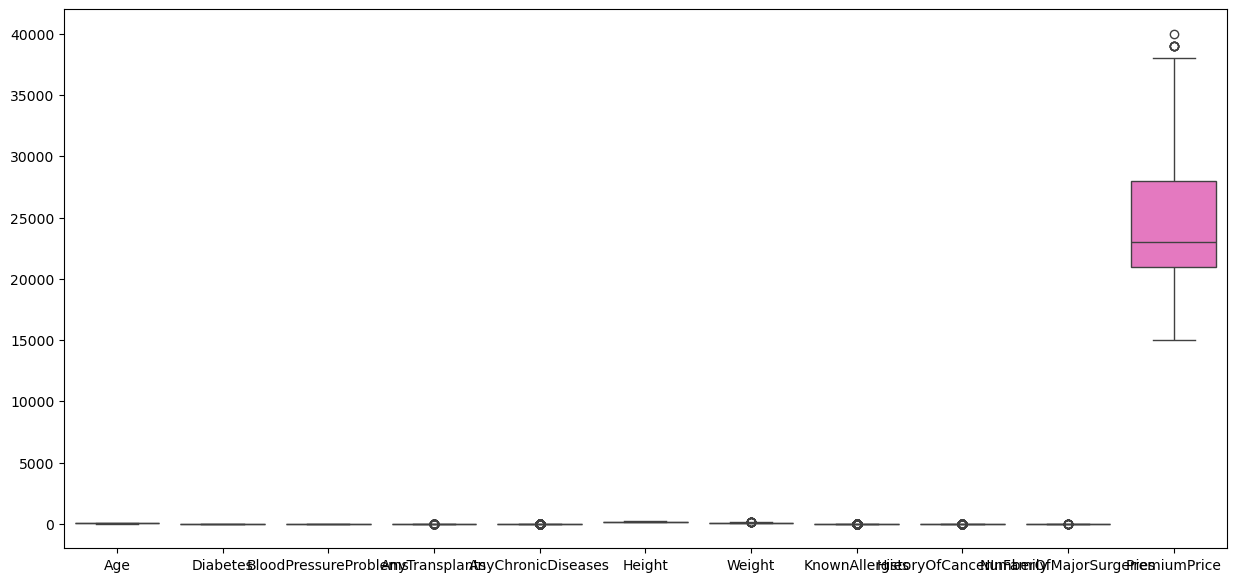

In [8]:
fig,ax=plt.subplots(1,1,figsize=(15,7))
sns.boxplot(data=med_data,ax=ax)

In [9]:
data=[]
for col in med_data:
    LO=[]
    UO=[]
    column=pd.Series(med_data[col])
    Max=max(column)
    Min=min(column)
    Range=Max-Min
    Q1=column.quantile(0.25)
    Q2=column.quantile(0.50)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in med_data[col]:
        if z>UF:
            UO.append(z)
        elif z<LF:
            LO.append(z)
    data.append((col,Max,Min,Range,Q1,Q2,Q3,IQR,UF,LF,[UO,LO]))
column_name=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=column_name)
datas

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,Age,66,18,48,30.0,42.0,53.0,23.0,87.5,-4.5,"[[], []]"
1,Diabetes,1,0,1,0.0,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
2,BloodPressureProblems,1,0,1,0.0,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
3,AnyTransplants,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,AnyChronicDiseases,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
5,Height,188,145,43,161.0,168.0,176.0,15.0,198.5,138.5,"[[], []]"
6,Weight,132,51,81,67.0,75.0,87.0,20.0,117.0,37.0,"[[118, 121, 119, 129, 127, 132, 120, 128, 120,..."
7,KnownAllergies,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
8,HistoryOfCancerInFamily,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
9,NumberOfMajorSurgeries,3,0,3,0.0,1.0,1.0,1.0,2.5,-1.5,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."


In [10]:
def iqr_winsorization(df):
    df_c=df.copy()
    col_to_treat=df_c.columns
    for col in col_to_treat:
        Q1=df_c[col].quantile(0.25)
        Q2=df_c[col].quantile(0.50)
        Q3=df_c[col].quantile(0.75)
        IQR=Q3-Q1
        UF=Q3+1.5*IQR
        LF=Q1-1.5*IQR
        df_c.loc[df_c[col]>UF,col]=UF
        df_c.loc[df_c[col]<LF,col]=LF
    return df_c
df=pd.DataFrame(med_data)
treated_df=iqr_winsorization(df.copy())

<Axes: >

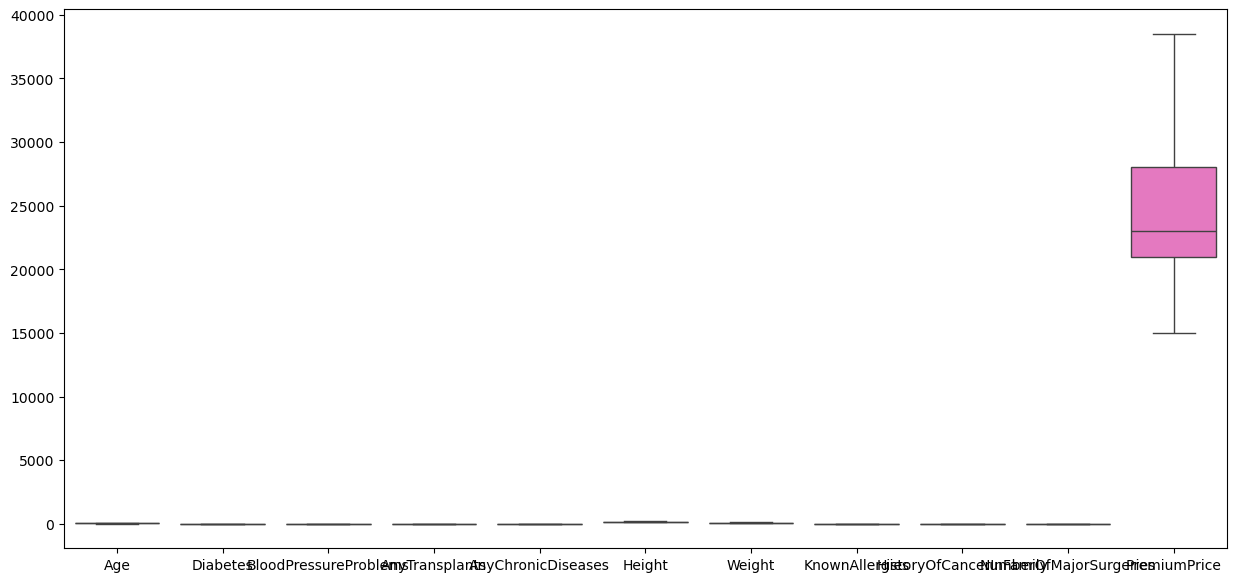

In [11]:
fig,ax=plt.subplots(1,1,figsize=(15,7))
sns.boxplot(data=treated_df,ax=ax)

In [12]:
data=[]
for col in treated_df:
    LO=[]
    UO=[]
    column=pd.Series(treated_df[col])
    Max=max(column)
    Min=min(column)
    Range=Max-Min
    Q1=column.quantile(0.25)
    Q2=column.quantile(0.50)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in treated_df[col]:
        if z>UF:
            UO.append(z)
        elif z<LF:
            LO.append(z)
    data.append((col,Max,Min,Range,Q1,Q2,Q3,IQR,UF,LF,[UO,LO]))
column_name=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=column_name)
datas

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,Age,66.0,18.0,48.0,30.0,42.0,53.0,23.0,87.5,-4.5,"[[], []]"
1,Diabetes,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
2,BloodPressureProblems,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
3,AnyTransplants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[], []]"
4,AnyChronicDiseases,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[], []]"
5,Height,188.0,145.0,43.0,161.0,168.0,176.0,15.0,198.5,138.5,"[[], []]"
6,Weight,117.0,51.0,66.0,67.0,75.0,87.0,20.0,117.0,37.0,"[[], []]"
7,KnownAllergies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[], []]"
8,HistoryOfCancerInFamily,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[], []]"
9,NumberOfMajorSurgeries,2.5,0.0,2.5,0.0,1.0,1.0,1.0,2.5,-1.5,"[[], []]"


In [13]:
scale=StandardScaler()
df_scaled=scale.fit_transform(treated_df)
df_scaled=pd.DataFrame(df_scaled,columns=treated_df.columns)
df_scaled

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.850750,-0.938978,0.0,0.0,-1.306105,-1.425307,0.0,0.0,-0.908200,0.107023
1,1.307981,1.175433,-0.938978,0.0,0.0,1.170852,-0.276146,0.0,0.0,-0.908200,0.748509
2,-0.411674,1.175433,1.064988,0.0,0.0,-1.008870,-1.281662,0.0,0.0,0.469470,-0.213720
3,0.734763,1.175433,1.064988,0.0,0.0,1.468086,1.160307,0.0,0.0,1.847140,0.588137
4,-0.268369,-0.850750,-0.938978,0.0,0.0,-0.216244,0.801194,0.0,0.0,0.469470,-0.213720
...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.850750,-0.938978,0.0,0.0,0.080991,-0.707081,0.0,0.0,-0.908200,-1.496692
982,1.594590,1.175433,1.064988,0.0,0.0,-1.504261,-0.491613,0.0,0.0,2.535975,0.588137
983,1.021372,-0.850750,1.064988,0.0,0.0,-1.306105,-0.419791,0.0,0.0,0.469470,0.748509
984,0.376502,1.175433,1.064988,0.0,0.0,-1.008870,-0.276146,0.0,0.0,0.469470,2.272038


In [14]:
corr=abs(df_scaled.corr()>=0.7)
corr

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,True,False,False,False,False,False,False,False,False,False,False
Diabetes,False,True,False,False,False,False,False,False,False,False,False
BloodPressureProblems,False,False,True,False,False,False,False,False,False,False,False
AnyTransplants,False,False,False,False,False,False,False,False,False,False,False
AnyChronicDiseases,False,False,False,False,False,False,False,False,False,False,False
Height,False,False,False,False,False,True,False,False,False,False,False
Weight,False,False,False,False,False,False,True,False,False,False,False
KnownAllergies,False,False,False,False,False,False,False,False,False,False,False
HistoryOfCancerInFamily,False,False,False,False,False,False,False,False,False,False,False
NumberOfMajorSurgeries,False,False,False,False,False,False,False,False,False,True,False


<Axes: >

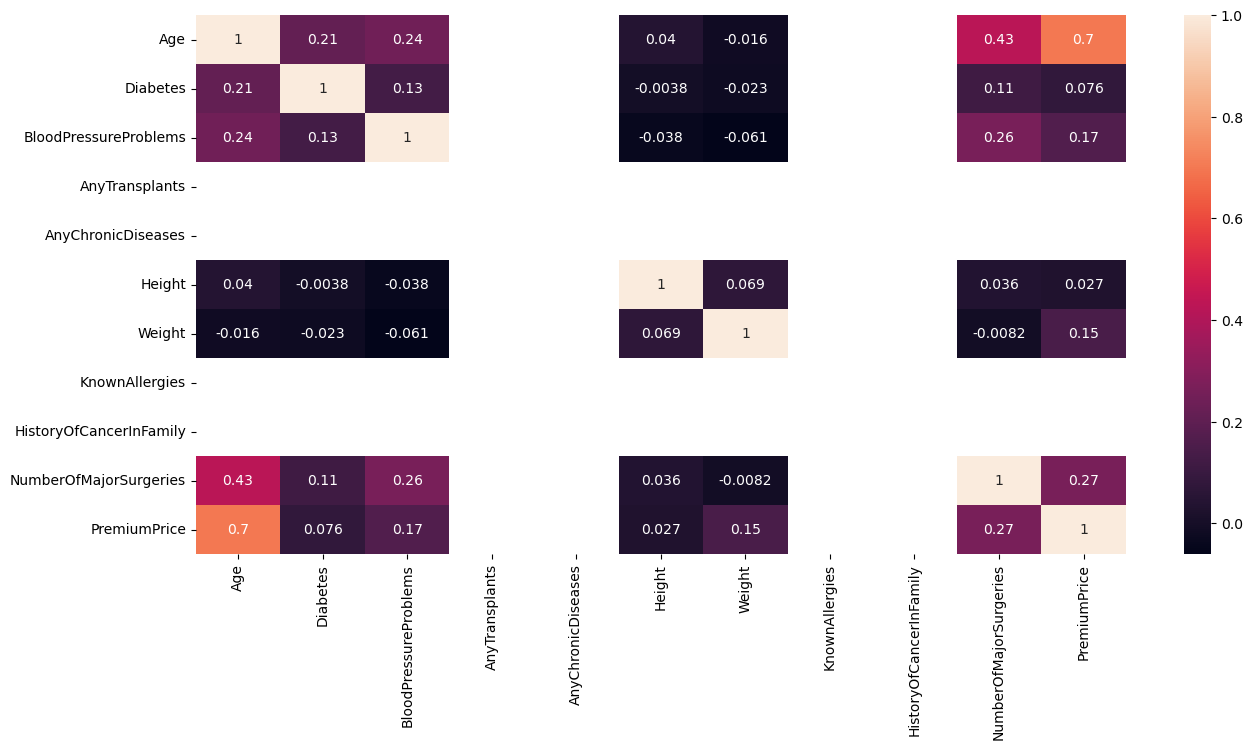

In [15]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(df_scaled.corr(),annot=True,ax=ax)

In [16]:
abs(df_scaled.corr()[["PremiumPrice"]].sort_values(["PremiumPrice"],ascending=False))

,PremiumPrice
PremiumPrice,1.000000
Age,0.698625
NumberOfMajorSurgeries,0.266039
BloodPressureProblems,0.166821
Weight,0.145397
Diabetes,0.076220
Height,0.027389
AnyTransplants,NaN
AnyChronicDiseases,NaN
KnownAllergies,NaN


In [17]:
selected_data=df_scaled.drop(["Diabetes","Height","AnyTransplants","AnyChronicDiseases","KnownAllergies","HistoryOfCancerInFamily"],axis=1)
selected_data

,Age,BloodPressureProblems,Weight,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.938978,-1.425307,-0.908200,0.107023
1,1.307981,-0.938978,-0.276146,-0.908200,0.748509
2,-0.411674,1.064988,-1.281662,0.469470,-0.213720
3,0.734763,1.064988,1.160307,1.847140,0.588137
4,-0.268369,-0.938978,0.801194,0.469470,-0.213720
...,...,...,...,...,...
981,-1.701415,-0.938978,-0.707081,-0.908200,-1.496692
982,1.594590,1.064988,-0.491613,2.535975,0.588137
983,1.021372,1.064988,-0.419791,0.469470,0.748509
984,0.376502,1.064988,-0.276146,0.469470,2.272038


In [18]:
# Task 3
X1=np.array(selected_data["Age"]).reshape(-1,1)
y1=np.array(selected_data["PremiumPrice"])

In [19]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=100)

In [20]:
s_model1=LinearRegression().fit(X1_train,y1_train)
s_model1

LinearRegression()

In [21]:
print("Intercept",s_model1.intercept_)
print("Slope",s_model1.coef_)

Intercept 0.003090416338162502
Slope [0.69417741]


In [22]:
y1_pred=s_model1.predict(X1_test)
y1_pred

array([-0.08372653,  0.36392806, -0.58112051,  0.31418866,  0.46340686,
       -0.68059931,  0.61262506,  0.46340686,  0.81158265, -0.43190232,
        0.96080085, -0.82981751, -0.82981751, -0.48164172, -0.78007811,
       -1.0785145 ,  0.56288566,  0.71210386,  1.01054025,  1.06027965,
        0.11523107,  0.61262506, -0.08372653,  0.26444927,  0.11523107,
       -1.1282539 , -0.03398713,  0.16497047, -0.53138112, -1.1779933 ,
       -0.97903571,  0.41366746,  0.26444927, -0.87955691, -1.0287751 ,
       -1.1779933 ,  0.31418866, -0.73033871,  0.01575227,  1.01054025,
       -0.97903571, -0.82981751,  0.36392806,  0.16497047, -0.58112051,
       -0.08372653, -0.18320532,  0.56288566,  0.26444927,  0.51314626,
       -0.43190232, -0.08372653,  0.76184325,  0.01575227, -0.63085991,
        0.51314626,  1.11001905,  1.20949784,  0.36392806, -0.92929631,
        0.11523107,  0.66236446,  0.11523107,  1.20949784, -0.43190232,
       -1.0785145 , -0.08372653,  1.01054025,  1.20949784, -0.82

In [23]:
MSE1=mean_squared_error(y1_test,y1_pred)
print("MSE",MSE1)
MAE1=mean_absolute_error(y1_test,y1_pred)
print("MAE",MAE1)
RMSE1=mean_squared_error(y1_test,y1_pred,squared=False)
print("RMSE",RMSE1)
R2_SCORE1=r2_score(y1_test,y1_pred)
print("R2_SCORE",R2_SCORE1)

MSE 0.5077435778350998
MAE 0.5298893416025076
RMSE 0.7125612800560382
R2_SCORE 0.5020025170649088


In [24]:
X2=np.array(selected_data[["Age","NumberOfMajorSurgeries"]]).reshape(-1,2)
y2=np.array(selected_data["PremiumPrice"])

In [25]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=100)

In [26]:
s_model2=LinearRegression().fit(X2_train,y2_train)
s_model2

LinearRegression()

In [27]:
print("Intercept",s_model2.intercept_)
print("Slope",s_model2.coef_)

Intercept 0.004815783409542284
Slope [ 0.71214509 -0.03993758]


In [28]:
y2_pred=s_model2.predict(X2_test)
y2_pred

array([-0.04797695,  0.30122283, -0.61326601,  0.30521683,  0.4582973 ,
       -0.66029884,  0.66639859,  0.4582973 ,  0.87050589, -0.40516472,
        0.91354472, -0.81337931, -0.81337931, -0.45619154, -0.76235248,
       -1.12353425,  0.56035095,  0.76845224,  1.07461318,  1.12564001,
        0.15613035,  0.61137777, -0.10299777,  0.25419   ,  0.15613035,
       -1.11954025,  0.00304988,  0.20715717, -0.50721836, -1.17056708,
       -1.0214806 ,  0.46229129,  0.30921082, -0.91942695, -1.07250742,
       -1.22558789,  0.36023764, -0.71132566,  0.0540767 ,  1.01959236,
       -0.96645978, -0.81337931,  0.35624365,  0.20715717, -0.55824519,
       -0.10299777, -0.1500306 ,  0.56035095,  0.25419   ,  0.50932412,
       -0.40516472, -0.04797695,  0.81947906,  0.0540767 , -0.66429283,
        0.50932412,  1.12164601,  1.27872048,  0.35624365, -0.91543296,
        0.15613035,  0.71742541,  0.10110953,  1.22369966, -0.46018553,
       -1.06851343, -0.04797695,  1.01959236,  1.16867884, -0.86

In [29]:
MSE2=mean_squared_error(y2_test,y2_pred)
print("MSE",MSE2)
MAE2=mean_absolute_error(y2_test,y2_pred)
print("MAE",MAE2)
RMSE2=mean_squared_error(y2_test,y2_pred,squared=False)
print("RMSE",RMSE2)
R2_SCORE2=r2_score(y2_test,y2_pred)
print("R2_SCORE",R2_SCORE2)

MSE 0.5071408246459809
MAE 0.5310972003724651
RMSE 0.7121382061411822
R2_SCORE 0.5025937004576997


In [30]:
X3=np.array(selected_data[["Age","NumberOfMajorSurgeries","BloodPressureProblems"]]).reshape(-1,3)
y3=np.array(selected_data["PremiumPrice"])

In [31]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2,random_state=100)

In [32]:
s_model3=LinearRegression().fit(X3_train,y3_train)
s_model3

LinearRegression()

In [33]:
print("Intercept",s_model3.intercept_)
print("slope",s_model3.coef_)

Intercept 0.0046077952006852215
slope [ 0.70965236 -0.04235679  0.01321279]


In [34]:
y3_pred=s_model3.predict(X3_test)
y3_pred

array([-0.03160459,  0.30932196, -0.6249184 ,  0.29034944,  0.46937207,
       -0.66826114,  0.65379241,  0.46937207,  0.88366325, -0.38754209,
        0.89302254, -0.7943278 , -0.82080579, -0.4383903 , -0.76995757,
       -1.13340054,  0.5710685 ,  0.75548884,  1.06057812,  1.11142634,
        0.14531028,  0.59543873, -0.08995828,  0.26597922,  0.14531028,
       -1.12589507, -0.00723437,  0.22263648, -0.48923852, -1.17674328,
       -1.03170411,  0.47687754,  0.3243329 , -0.93000769, -1.08255233,
       -1.20861898,  0.34870313, -0.71910936,  0.04361385,  1.02870242,
       -0.94687244, -0.7943278 ,  0.34119766,  0.19615849, -0.56656472,
       -0.08995828, -0.15977901,  0.5710685 ,  0.23950123,  0.4937423 ,
       -0.38754209, -0.03160459,  0.80633705,  0.04361385, -0.67576662,
        0.4937423 ,  1.13039885,  1.26397098,  0.36767564, -0.92250221,
        0.14531028,  0.73111861,  0.11343458,  1.23209528, -0.44589578,
       -1.04856887, -0.05808258,  1.02870242,  1.17374159, -0.85

In [35]:
MSE3=mean_squared_error(y3_test,y3_pred)
print("MSE",MSE3)
MAE3=mean_absolute_error(y3_test,y3_pred)
print("MAE",MAE3)
RMSE3=mean_squared_error(y3_test,y3_pred,squared=False)
print("RMSE",RMSE3)
R2_SCORE3=r2_score(y3_test,y3_pred)
print("R2 SCORE",R2_SCORE3)

MSE 0.5083226899204569
MAE 0.5312997911271563
RMSE 0.7129675237487728
R2 SCORE 0.5014345209868988


In [36]:
# Task 5
def calculating_residuals(model,features,label):
    Predictions=model.predict(features)
    df_results=pd.DataFrame({"Actual":label,"Predictions":Predictions})
    df_results["Residuals"]=abs(df_results["Actual"])-abs(df_results["Predictions"])
    return df_results
def Linear_regression(model,features,label):
    df_results=calculating_residuals(model,features,label)
    sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color="red",linestyle="--")
    plt.show()

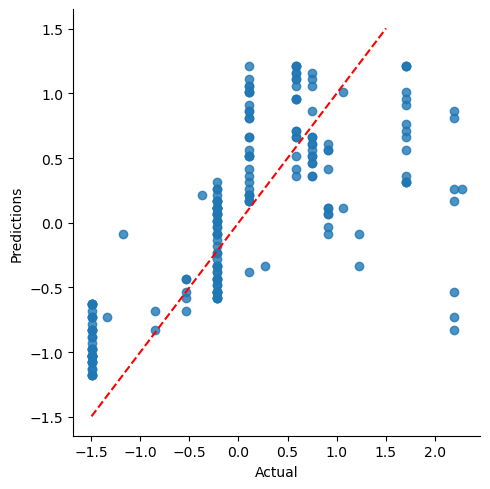

In [37]:
Linear_regression(s_model1,X1_test,y1_test)

In [38]:
def homoscadicity_assumption(model,features,label):
    df_results=calculating_residuals(model,features,label)
    plt.subplots(figsize=(7,5))
    ax=plt.subplot(111) # to remove spine
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="red",linestyle="--")
    plt.title("Residual Plot")
    plt.xlabel("Index Value")
    plt.ylabel("Residual Value")
    plt.show()

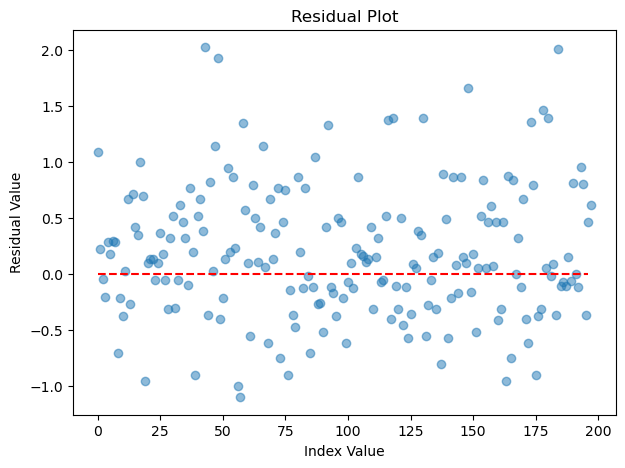

In [39]:
homoscadicity_assumption(s_model1,X1_test,y1_test)

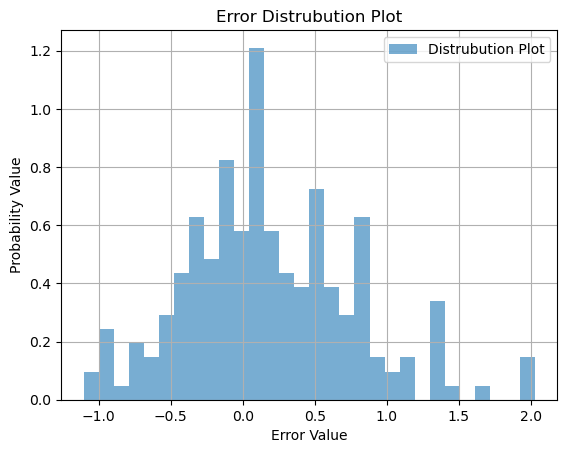

In [40]:
df_results=calculating_residuals(s_model1,X1_test,y1_test)
plt.hist(df_results.Residuals,bins=30,label="Distrubution Plot",density=True,alpha=0.6)
plt.xlabel("Error Value")
plt.ylabel("Probability Value")
plt.title("Error Distrubution Plot")
plt.legend()
plt.grid(True)
plt.show()

Overall Interpretation:
The R² score of 0.5026 suggests that the multiple linear regression model explains 50.26% of the variance, indicating a moderate fit. The MSE (0.5071) and RMSE (0.7121) show the extent of prediction errors, while the MAE (0.5311) suggests an average deviation of 0.53 units between actual and predicted values. Compared to a simple linear regression model, multiple variables may have contributed to slight improvements but with increased complexity.